In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
chicago_df_1 = pd.read_csv('Chicago_Crimes_2001_to_2004.csv', error_bad_lines = False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines = False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines = False)
chicago_df_4 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines = False)

b'Skipping line 533719: expected 23 fields, saw 24\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (9,10) have mixed types.Specify dtype option on import or set low_memory=False.



In [5]:
Final_df = pd.concat([chicago_df_1,chicago_df_2,chicago_df_3,chicago_df_4])

In [6]:
Final_df.shape

(4434284, 23)

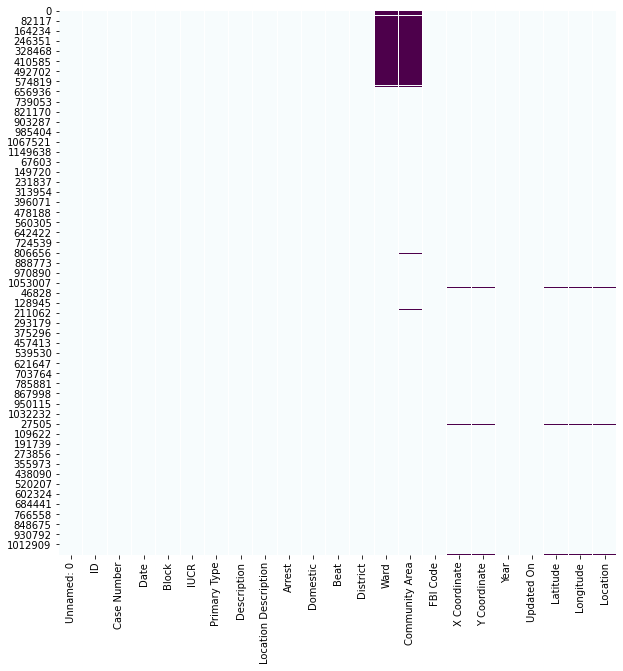

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(Final_df.isnull(), cbar=False,cmap='BuPu')

In [10]:
Final_df.drop(['Unnamed: 0','Case Number', 'ID','IUCR','X Coordinate','Y Coordinate','Updated On','Year','FBI Code','Beat','Ward','Community Area','Location','Latitude','Longitude'], axis=1,inplace=True)

In [11]:
Final_df.Date = pd.to_datetime(Final_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [12]:
Final_df.index = pd.DatetimeIndex(Final_df.Date)

In [13]:
Final_df.Date

Date
2004-01-01 00:01:00   2004-01-01 00:01:00
2003-03-01 00:00:00   2003-03-01 00:00:00
2004-06-20 11:00:00   2004-06-20 11:00:00
2004-12-30 20:00:00   2004-12-30 20:00:00
2003-05-01 01:00:00   2003-05-01 01:00:00
                              ...        
2015-08-13 15:15:00   2015-08-13 15:15:00
2015-08-13 14:38:00   2015-08-13 14:38:00
2015-08-13 12:30:00   2015-08-13 12:30:00
2015-08-13 14:00:00   2015-08-13 14:00:00
2015-08-13 14:01:00   2015-08-13 14:01:00
Name: Date, Length: 4434284, dtype: datetime64[ns]

In [14]:
Final_df['Primary Type'].value_counts()


THEFT                                911083
BATTERY                              814246
CRIMINAL DAMAGE                      513582
NARCOTICS                            506607
OTHER OFFENSE                        274908
ASSAULT                              270778
BURGLARY                             255364
MOTOR VEHICLE THEFT                  204080
ROBBERY                              165286
DECEPTIVE PRACTICE                   154654
CRIMINAL TRESPASS                    126734
PROSTITUTION                          49774
WEAPONS VIOLATION                     43128
PUBLIC PEACE VIOLATION                33861
OFFENSE INVOLVING CHILDREN            27555
CRIM SEXUAL ASSAULT                   16262
SEX OFFENSE                           15949
GAMBLING                              10712
LIQUOR LAW VIOLATION                  10580
INTERFERENCE WITH PUBLIC OFFICER       9308
ARSON                                  7430
KIDNAPPING                             4592
HOMICIDE                        

In [18]:
order_data=Final_df['Primary Type'].value_counts().iloc[:15]

In [19]:
Final_df['Primary Type'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'NARCOTICS', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'CRIMINAL TRESPASS', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

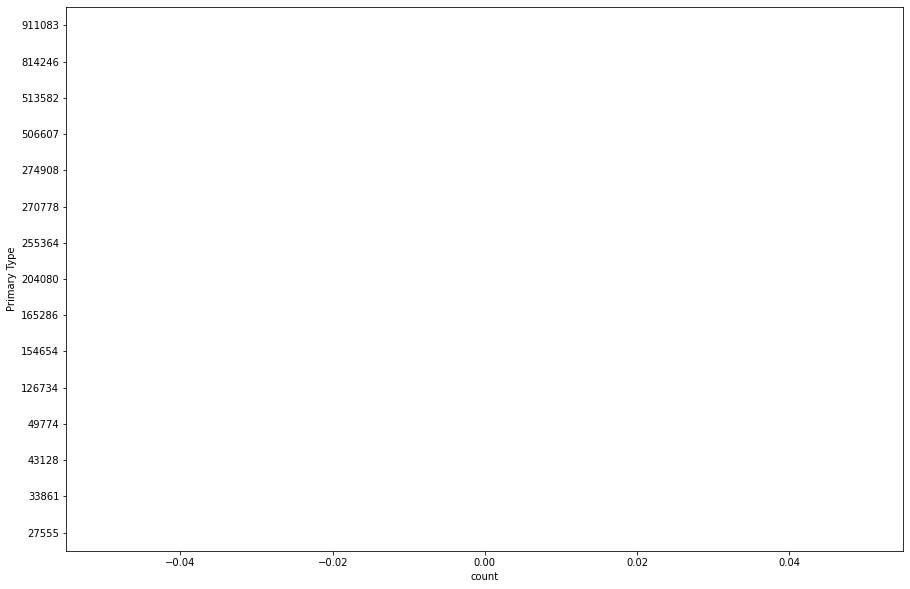

In [21]:
order_data=Final_df['Primary Type'].value_counts().iloc[:15]
plt.figure(figsize=(15,10))
sns.countplot(y='Primary Type', data=Final_df,order=order_data
              )

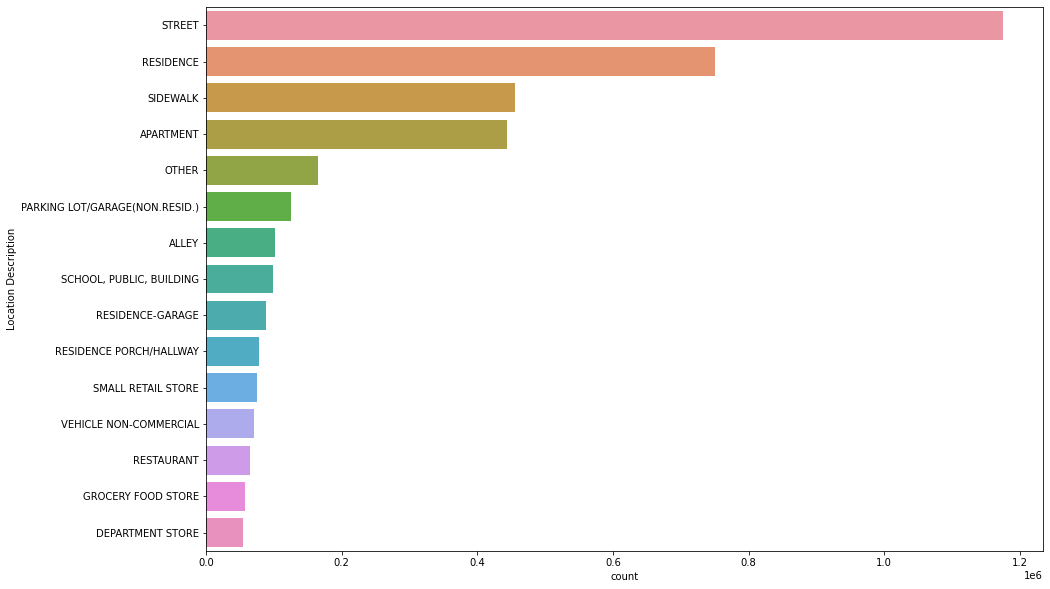

In [22]:
plt.figure(figsize=(15,10))
sns.countplot(y = 'Location Description',data=Final_df,order=Final_df['Location Description'].value_counts().iloc[:15].index)

In [23]:
Final_df.resample('Y').size()

Date
2001-12-31    485033
2002-12-31    485320
2003-12-31    192278
2004-12-31      1521
2005-12-31      4302
2006-12-31    693629
2007-12-31    390365
2008-12-31    426389
2009-12-31    391597
2010-12-31    268323
2011-12-31       535
2012-12-31    334750
2013-12-31    305811
2014-12-31    273246
2015-12-31    155237
2016-12-31     25948
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of crimes')

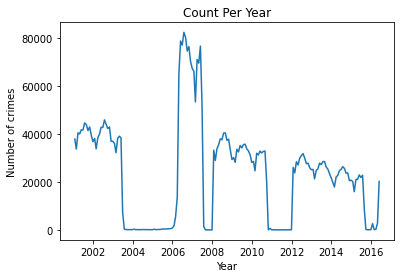

In [25]:
plt.plot(Final_df.resample('M').size())
plt.title('Count Per Year')
plt.xlabel('Year')
plt.ylabel('Number of crimes')

In [26]:
chicago_prophet = Final_df.resample('M').size().reset_index()

In [27]:
chicago_prophet

,Date,0
0,2001-01-31,37934
1,2001-02-28,33752
2,2001-03-31,40510
3,2001-04-30,40028
4,2001-05-31,41770
...,...,...
180,2016-01-31,2641
181,2016-02-29,125
182,2016-03-31,223
183,2016-04-30,2727


In [28]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [29]:
chicago_prophet_final = chicago_prophet.rename(columns={'Date':'ds','Crime Count':'y'})

In [30]:
chicago_prophet_final

,ds,y
0,2001-01-31,37934
1,2001-02-28,33752
2,2001-03-31,40510
3,2001-04-30,40028
4,2001-05-31,41770
...,...,...
180,2016-01-31,2641
181,2016-02-29,125
182,2016-03-31,223
183,2016-04-30,2727


In [31]:
m = Prophet()
m.fit(chicago_prophet_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
future = m.make_future_dataframe(periods=720)
forecast = m.predict(future)

In [33]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,32436.591183,5579.186165,56411.002934,32436.591183,32436.591183,-826.309841,-826.309841,-826.309841,-826.309841,-826.309841,-826.309841,0.0,0.0,0.0,31610.281342
1,2001-02-28,32351.849700,2524.484468,53374.459951,32351.849700,32351.849700,-4412.662596,-4412.662596,-4412.662596,-4412.662596,-4412.662596,-4412.662596,0.0,0.0,0.0,27939.187105
2,2001-03-31,32258.028773,7328.949848,57760.097101,32258.028773,32258.028773,786.725745,786.725745,786.725745,786.725745,786.725745,786.725745,0.0,0.0,0.0,33044.754518
3,2001-04-30,32167.234327,11187.811712,62288.256038,32167.234327,32167.234327,4466.214231,4466.214231,4466.214231,4466.214231,4466.214231,4466.214231,0.0,0.0,0.0,36633.448558
4,2001-05-31,32073.413400,15873.376390,67701.175155,32073.413400,32073.413400,8551.886854,8551.886854,8551.886854,8551.886854,8551.886854,8551.886854,0.0,0.0,0.0,40625.300253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900,2018-05-17,13325.638854,-7113.825319,43866.668664,13325.627210,13325.650365,5242.664930,5242.664930,5242.664930,5242.664930,5242.664930,5242.664930,0.0,0.0,0.0,18568.303783
901,2018-05-18,13322.612613,-5882.020217,44021.789084,13322.600951,13322.624144,5557.455958,5557.455958,5557.455958,5557.455958,5557.455958,5557.455958,0.0,0.0,0.0,18880.068570
902,2018-05-19,13319.586371,-6024.918646,44017.112650,13319.574692,13319.597919,5885.919366,5885.919366,5885.919366,5885.919366,5885.919366,5885.919366,0.0,0.0,0.0,19205.505738
903,2018-05-20,13316.560130,-6058.391639,45305.973743,13316.548434,13316.571694,6221.553474,6221.553474,6221.553474,6221.553474,6221.553474,6221.553474,0.0,0.0,0.0,19538.113604


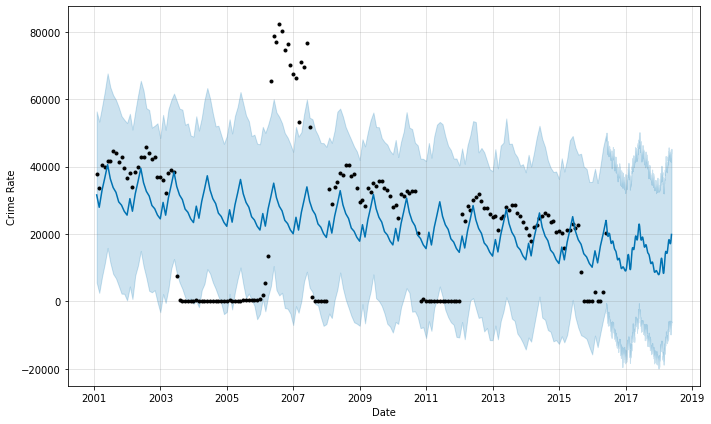

In [34]:
figure = m.plot(forecast, xlabel='Date',ylabel='Crime Rate')

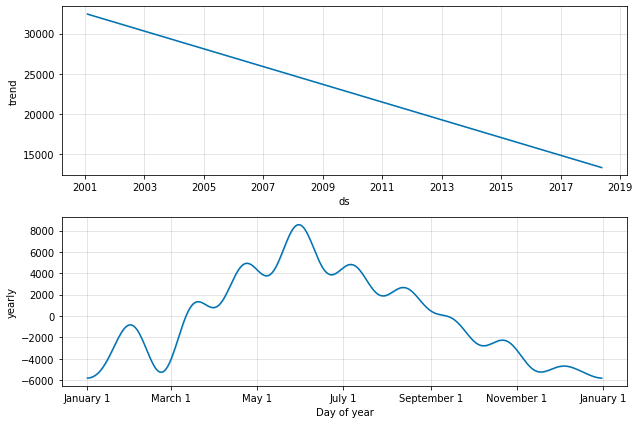

In [35]:
figure = m.plot_components(forecast)